In [60]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]
from math import sqrt
import imageio
import numpy as np
# from skimage.draw import circle, circle_perimeter,circle_perimeter_aa
from skimage import data, img_as_float
from skimage.feature import blob_log,peak_local_max
from skimage.color import rgb2gray, label2rgb
from skimage.measure import label, regionprops,find_contours
from skimage.filters import gaussian, threshold_otsu, threshold_multiotsu, difference_of_gaussians
from skimage.segmentation import active_contour, watershed
from scipy import ndimage as ndi

(-0.5, 499.5, 499.5, -0.5)

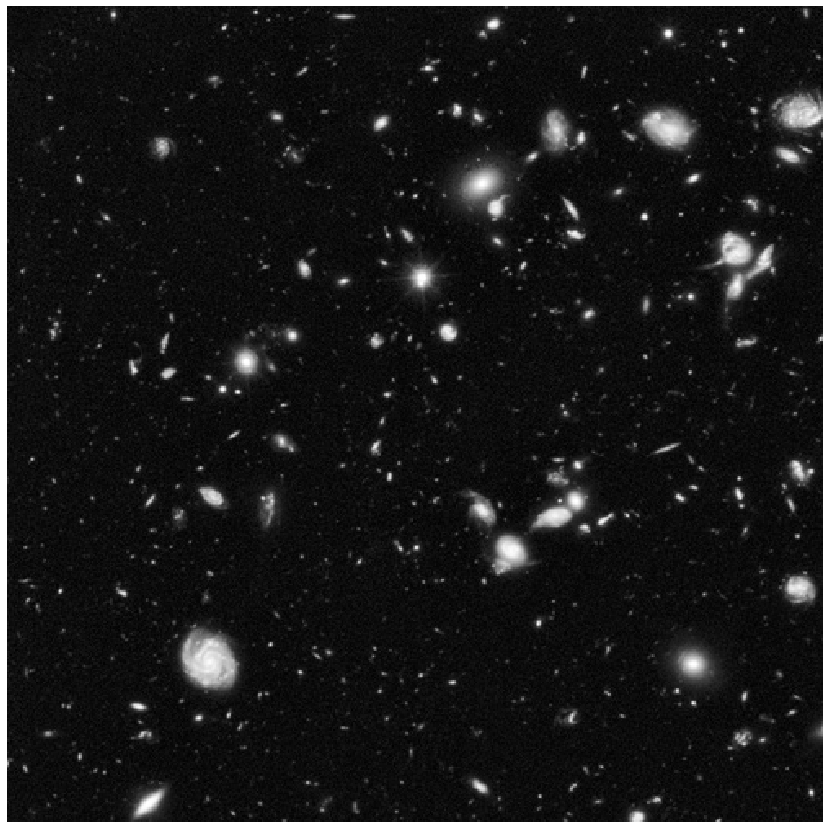

In [61]:
#############
# IMAGE
#############
img_stars = data.hubble_deep_field()[0:500, 0:500]
stars_gray = rgb2gray(img_stars)
rows_img = stars_gray.shape[0]
columns_img = stars_gray.shape[1]

plt.imshow(stars_gray, cmap=plt.cm.gray)
plt.axis('off')

Number of contours counted :  1247


(-0.5, 499.5, 499.5, -0.5)

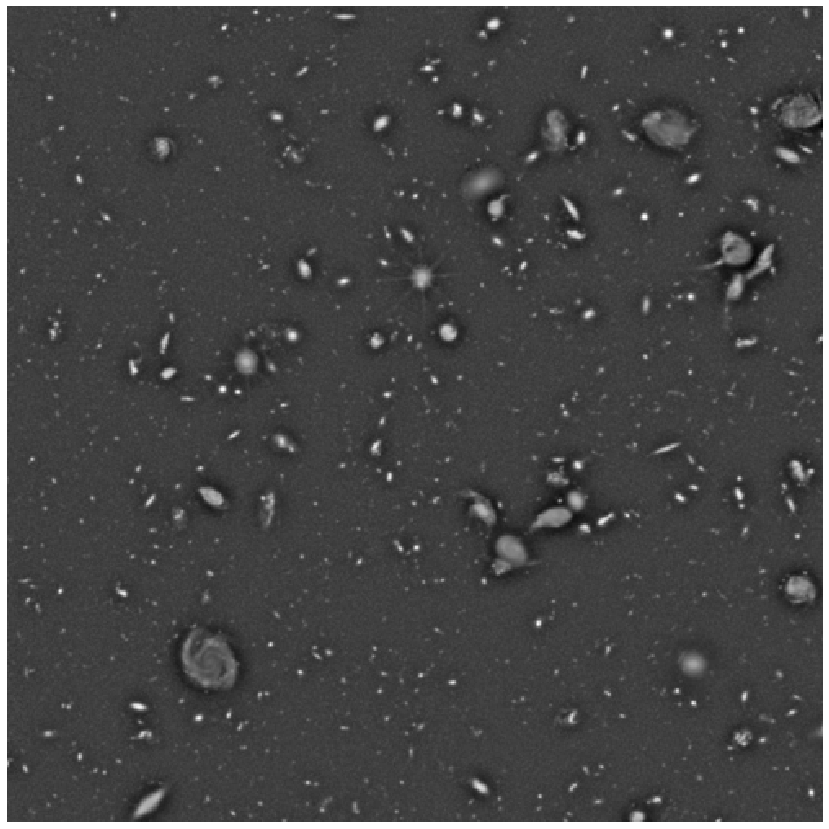

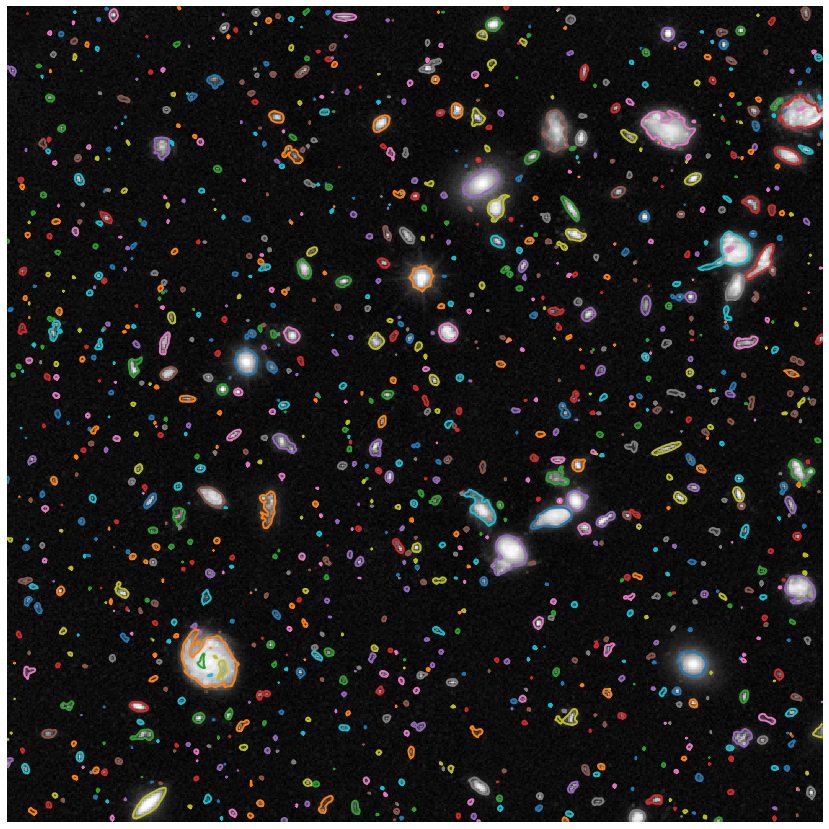

In [71]:
stars_filtered = difference_of_gaussians(stars_gray, low_sigma = 0.5, high_sigma=5)
fig_filtered, ax_filtered = plt.subplots()
ax_filtered.imshow(stars_filtered, cmap=plt.cm.gray)
plt.axis('off')

#print("mean values : " ,stars_gray.mean())
#find contour
## skimage.measure.find_contours(image, level=None, fully_connected='low', positive_orientation='low', *, mask=None)
# contours = find_contours(stars_filtered, level = 0.1)
##level 0.1 Number of contours counted :  389
##level 0.5 Number of contours counted :  54
##level 0.05 Number of contours counted :  618 (fully_connected='low'), (615 fully_connected='high')

# MASK FOR CLIP
mask = np.zeros_like(stars_gray)

# FIND CONTOUR LEVELS
contours = find_contours(stars_filtered,level = 0.05)

fig_c, ax_c = plt.subplots()
ax_c.imshow(stars_gray, interpolation='nearest', cmap=plt.cm.gray)

for n, contour in enumerate(contours):
    ax_c.plot(contour[:, 1], contour[:, 0], linewidth=2)
    mask[np.round(contour[:, 0]).astype('int'), np.round(contour[:, 1]).astype('int')] = 1
    
print("Number of contours counted : " ,len(contours))
ax_c.axis('image')
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

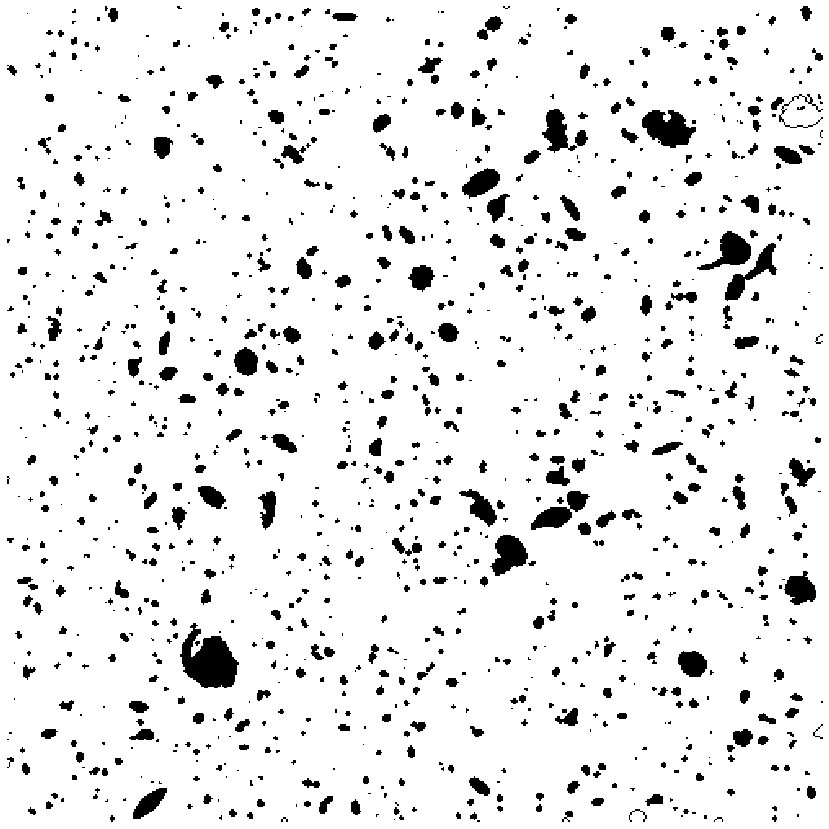

In [72]:
mask = ndi.binary_fill_holes(mask)
mask = ~mask
fig, ax = plt.subplots()
ax.imshow(mask, cmap=plt.cm.gray)
plt.axis('off')

(-0.5, 499.5, 499.5, -0.5)

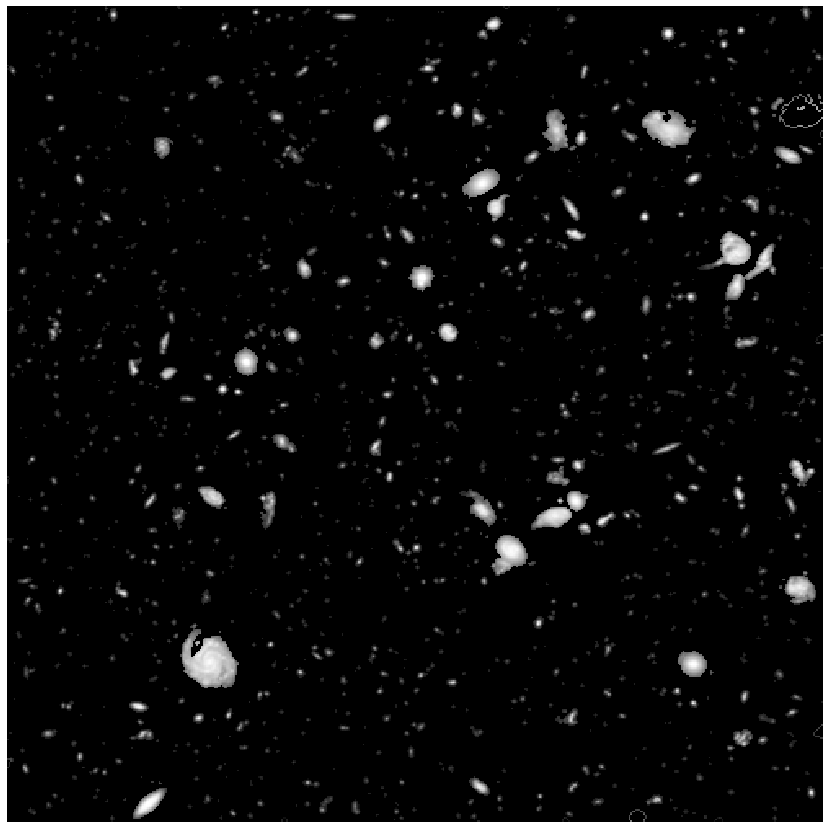

In [73]:

clipped_stars = stars_gray
clipped_stars[mask] = 0
fig, ax = plt.subplots()
ax.imshow(clipped_stars, cmap=plt.cm.gray)
plt.axis('off')

In [74]:
label_img = label(clipped_stars)
regions = regionprops(label_img)

In [75]:
len(regions)

1

In [76]:
regions
